In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from acquire import opsd_germany_daily, get_store_data
from prepare import prep_german_data, prep_store_data, hist_plot

In [134]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [135]:
df = get_store_data()
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


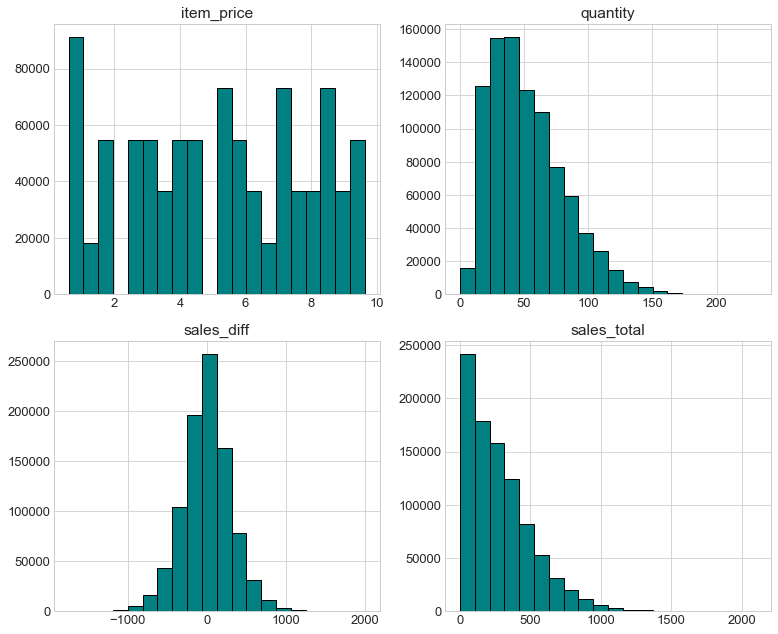

,quantity,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40,207.48
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55,-92.85
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60,328.05
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00,-159.60


In [136]:
df = prep_store_data(df)
df.head()

# 1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.


In [137]:
# Resample by day
df = df.resample('D').sum()
# Using the year column as the index
df['year'] = df.index.year
df.head()

,quantity,item_price,sales_total,sales_diff,year
sale_date,,,,,
2013-01-01 00:00:00+00:00,13696.0,2580.2,73844.01,200.06,2013
2013-01-02 00:00:00+00:00,13678.0,2580.2,73570.58,41.58,2013
2013-01-03 00:00:00+00:00,14488.0,2580.2,78169.48,-185.35,2013
2013-01-04 00:00:00+00:00,15677.0,2580.2,84467.73,73.19,2013
2013-01-05 00:00:00+00:00,16237.0,2580.2,87621.85,-129.48,2013


In [138]:
df.shape

(1826, 5)

In [139]:
# Using the human based approach. Dates range from 2013 - 2016
train = df[:'2015'] # Includes everything up to 2015
test = df['2016'] 

In [140]:
print(train.shape)
print(test.shape)

(1095, 5)
(366, 5)


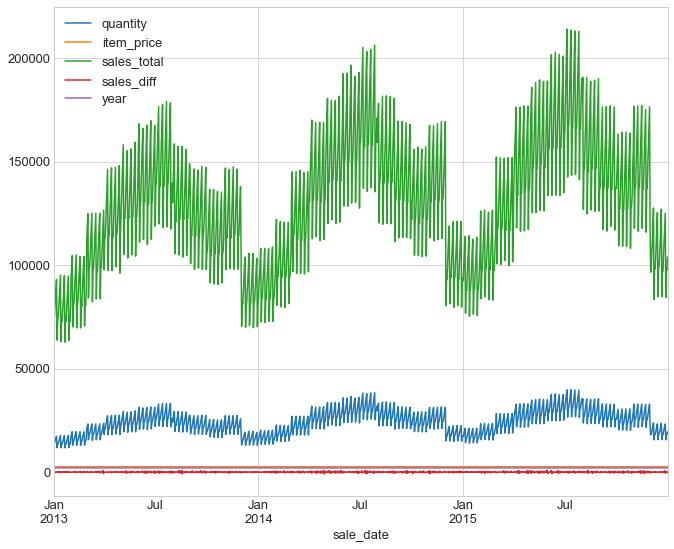

In [141]:
#Showing all the variables in train set
train.plot()

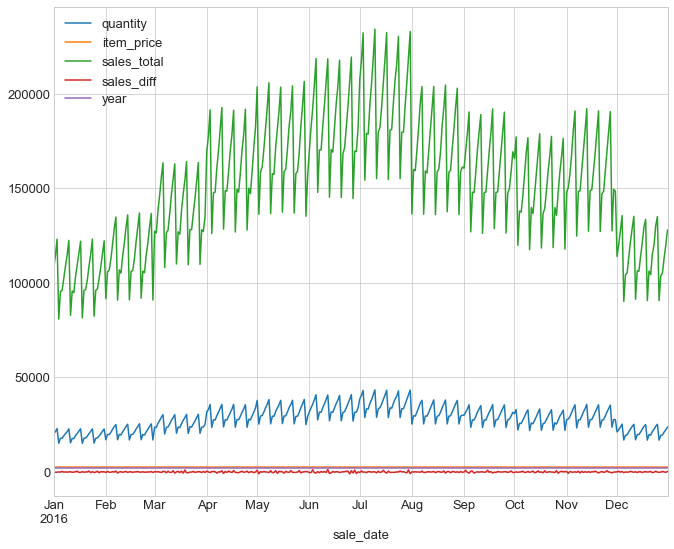

In [142]:
# Only 2016 data
test.plot()

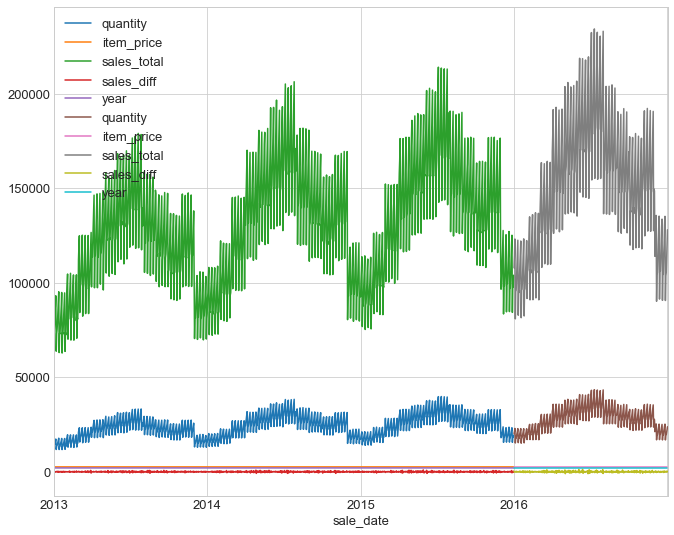

In [143]:
#Plots showing both the train and test data
ax= train.plot()
test.plot(ax=ax)

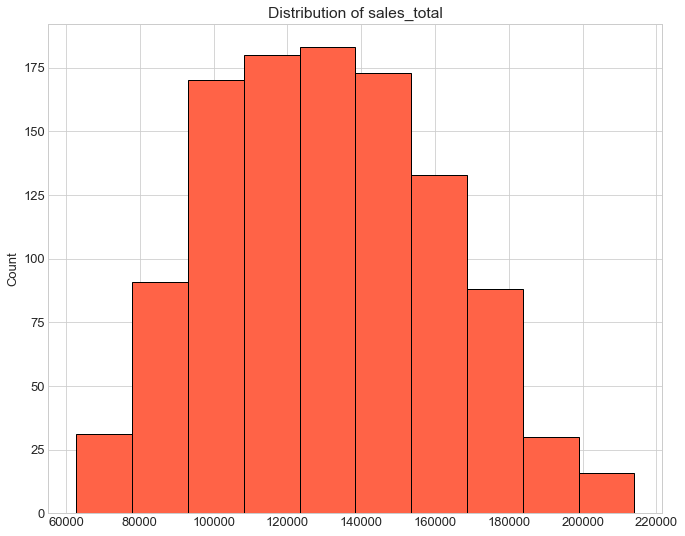

In [144]:
hist_plot(train, 'sales_total')

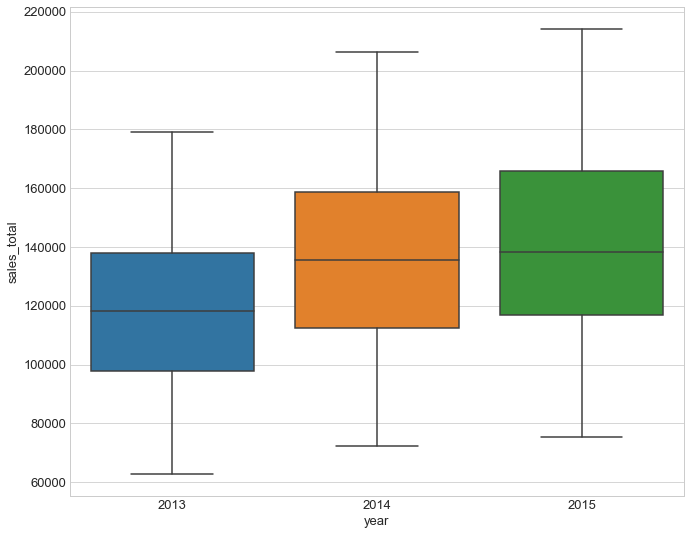

In [145]:
sns.boxplot(data=train, y='sales_total', x='year')

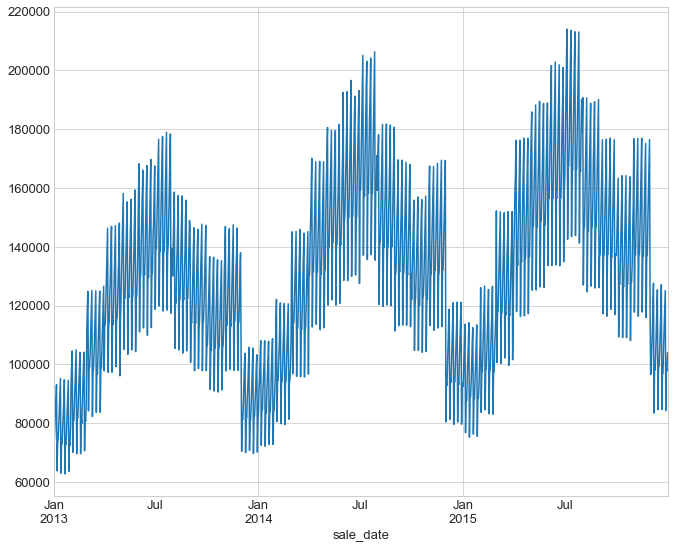

In [146]:
train.sales_total.plot()

# 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

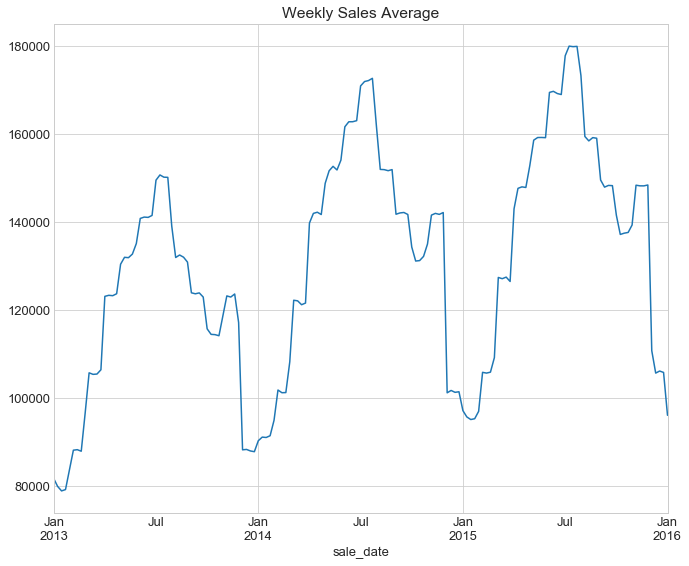

In [147]:
train.sales_total.resample('W').mean().plot(title = 'Weekly Sales Average')

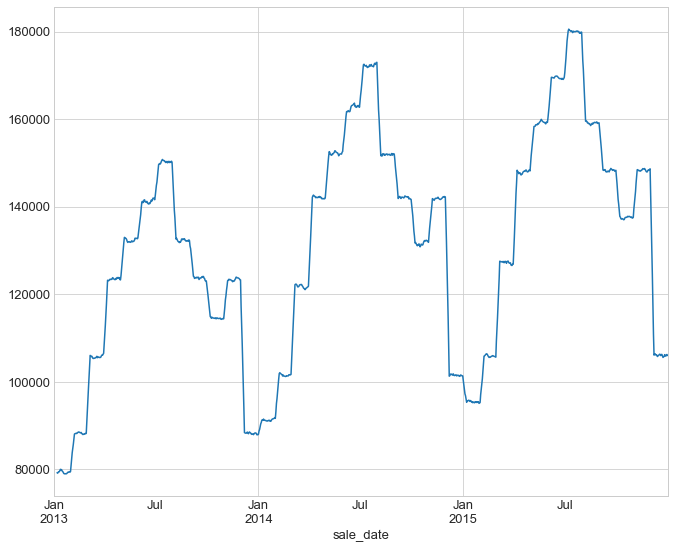

In [148]:
# 7 day moving average
train.sales_total.resample('D').mean().rolling(7).mean().plot(label='7 Day Rolling Average')

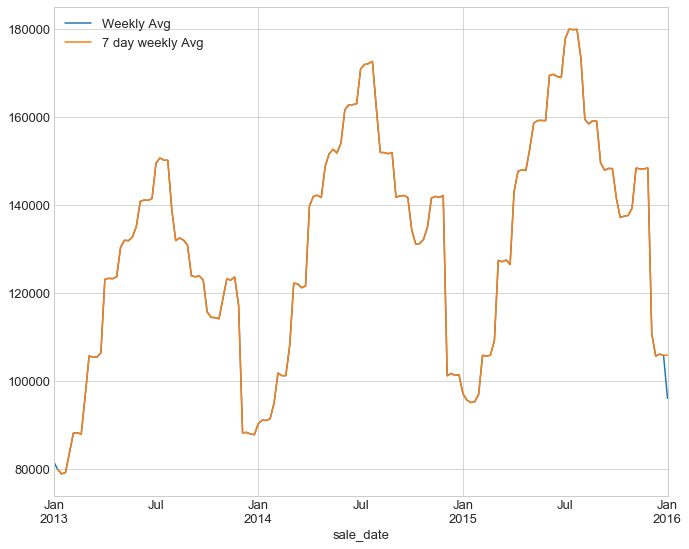

In [149]:
# Both plots on top of each other
y= train.sales_total
y.resample('W').mean().plot(label= 'Weekly Avg')
y.resample('D').mean().rolling(7).mean().plot(label='7 day weekly Avg')
plt.legend()
plt.show()


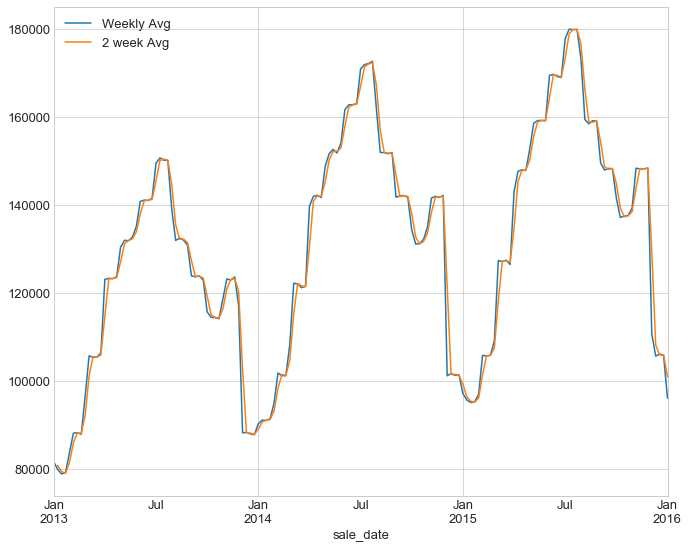

In [150]:
# 2 weeking rolling average. Can start to see they differ a bit
y= train.sales_total
y.resample('W').mean().plot(label= 'Weekly Avg')
y.resample('W').mean().rolling(2).mean().plot(label='2 week Avg')
plt.legend()
plt.show()

# 4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

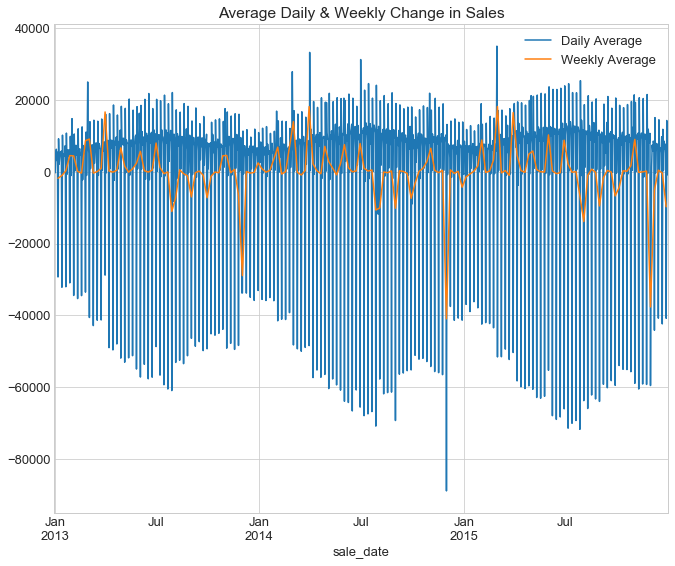

In [151]:
y.resample('D').mean().diff().plot(label='Daily Average')
y.resample('W').mean().diff().plot(label='Weekly Average')
plt.title('Average Daily & Weekly Change in Sales')
plt.legend()

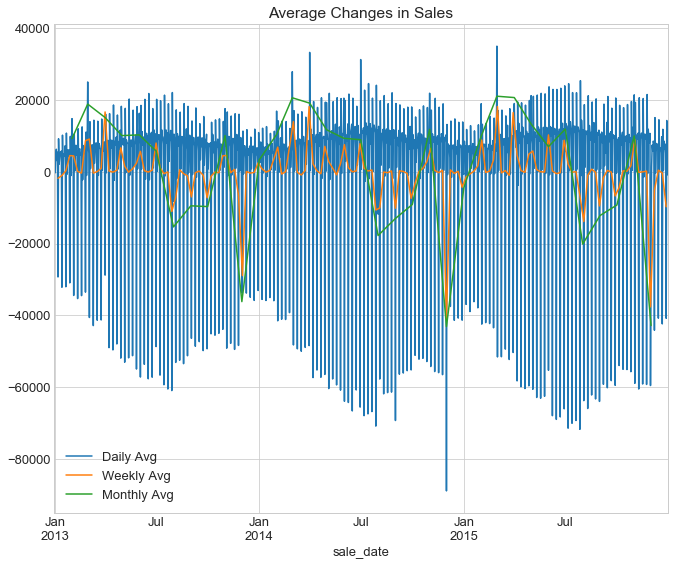

In [152]:
y.resample('D').mean().diff().plot(label='Daily Avg')
y.resample('W').mean().diff().plot(label= 'Weekly Avg')
y.resample('M').mean().diff().plot(label= 'Monthly Avg')
plt.title('Average Changes in Sales')
plt.legend()
plt.show()

# 5. Plot a time series decomposition.
### Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.¶

In [153]:
# Decomposition Code DF
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-37435.450173,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-38017.166821,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-38637.757797,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-38633.862371,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-36345.604129,NaN


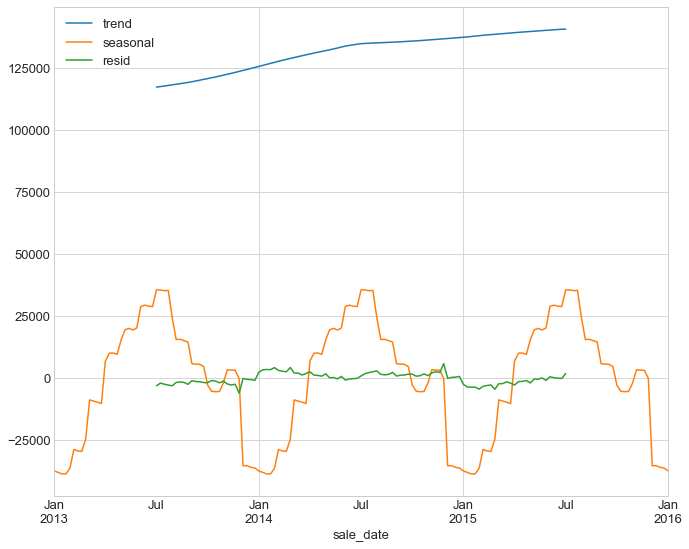

In [154]:
# iloc[:, 1:] The first : gets all the rows and  1: gets the second column index 1 and
# all the other columns
decomposition.iloc[:, 1:].plot()

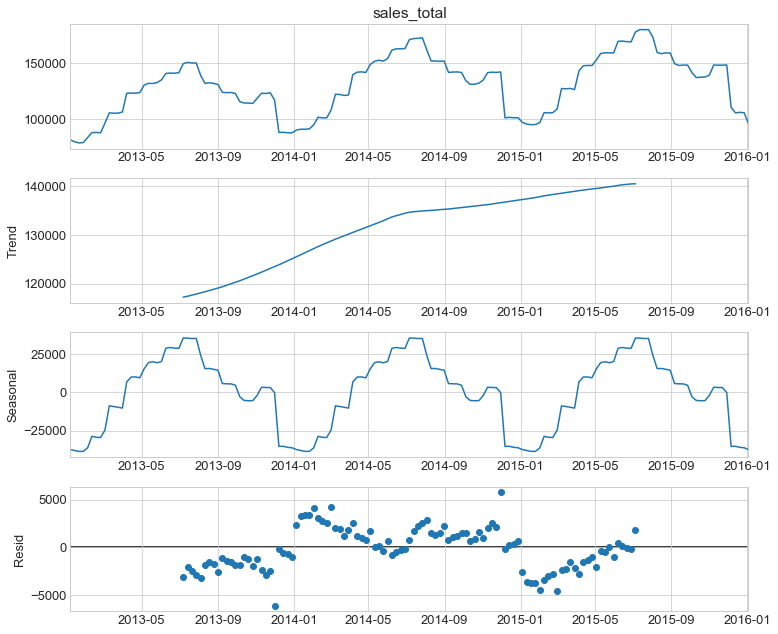

In [155]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

# 6. Create a lag plot (day over day).¶

Text(0.5, 1.0, 'Lag Plot with lag=1')

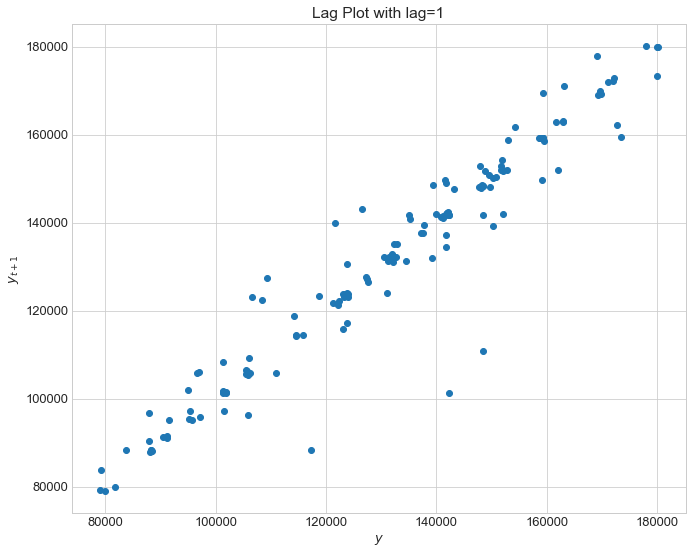

In [37]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag Plot with lag=1')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[Text(0, 0.5, 't + 1'), Text(0.5, 0, 't')]

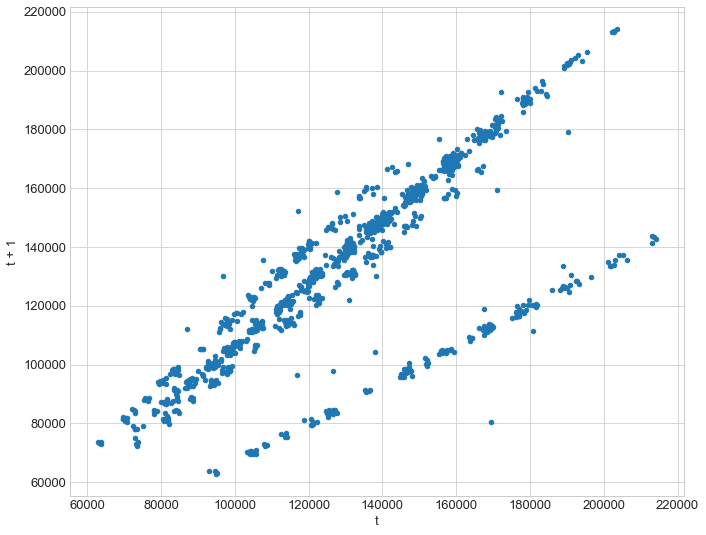

In [41]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

,quantity,item_price,this_week,sales_diff,year,y(t + 1),the_next_week
sale_date,,,,,,,
2013-01-06 00:00:00+00:00,15177.833333,2580.2,81794.583333,1.843333,2013.0,80116.838333,79990.601429
2013-01-13 00:00:00+00:00,14843.142857,2580.2,79990.601429,31.774286,2013.0,79884.427143,78973.360000
2013-01-20 00:00:00+00:00,14707.142857,2580.2,78973.360000,-4.914286,2013.0,78938.260000,79272.691429
2013-01-27 00:00:00+00:00,14756.857143,2580.2,79272.691429,-2.342857,2013.0,79398.127143,83792.507143
2013-02-03 00:00:00+00:00,15575.285714,2580.2,83792.507143,-24.342857,2013.0,84716.047143,88227.801429
...,...,...,...,...,...,...,...
2015-12-06 00:00:00+00:00,20585.571429,2580.2,110847.644286,-77.451429,2015.0,106068.528571,105751.867143
2015-12-13 00:00:00+00:00,19658.571429,2580.2,105751.867143,24.025714,2015.0,105912.010000,106217.608571
2015-12-20 00:00:00+00:00,19755.142857,2580.2,106217.608571,-18.291429,2015.0,106236.561429,105900.275714


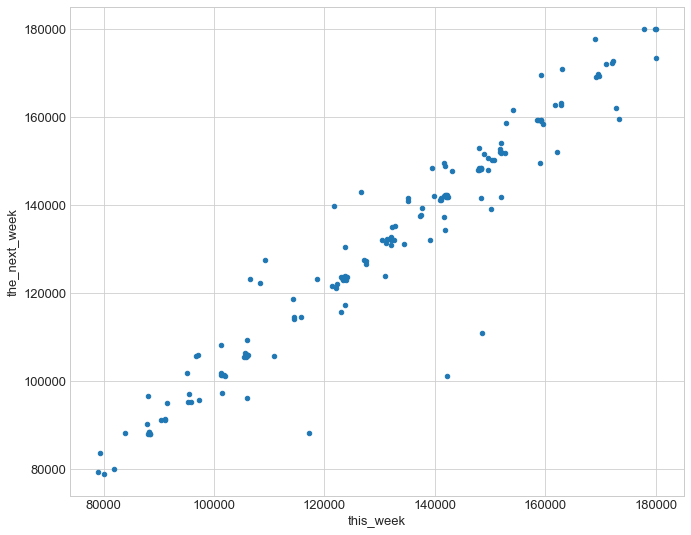

In [42]:
# Weekly lag plot
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,quantity,item_price,this_week,sales_diff,year,y(t + 1),12_weeks_out
sale_date,,,,,,,
2013-01-06 00:00:00+00:00,15177.833333,2580.2,81794.583333,1.843333,2013.0,80116.838333,106501.331429
2013-01-13 00:00:00+00:00,14843.142857,2580.2,79990.601429,31.774286,2013.0,79884.427143,123193.640000
2013-01-20 00:00:00+00:00,14707.142857,2580.2,78973.360000,-4.914286,2013.0,78938.260000,123430.685714
2013-01-27 00:00:00+00:00,14756.857143,2580.2,79272.691429,-2.342857,2013.0,79398.127143,123345.042857
2013-02-03 00:00:00+00:00,15575.285714,2580.2,83792.507143,-24.342857,2013.0,84716.047143,123791.114286
...,...,...,...,...,...,...,...
2015-12-06 00:00:00+00:00,20585.571429,2580.2,110847.644286,-77.451429,2015.0,106068.528571,NaN
2015-12-13 00:00:00+00:00,19658.571429,2580.2,105751.867143,24.025714,2015.0,105912.010000,NaN
2015-12-20 00:00:00+00:00,19755.142857,2580.2,106217.608571,-18.291429,2015.0,106236.561429,NaN


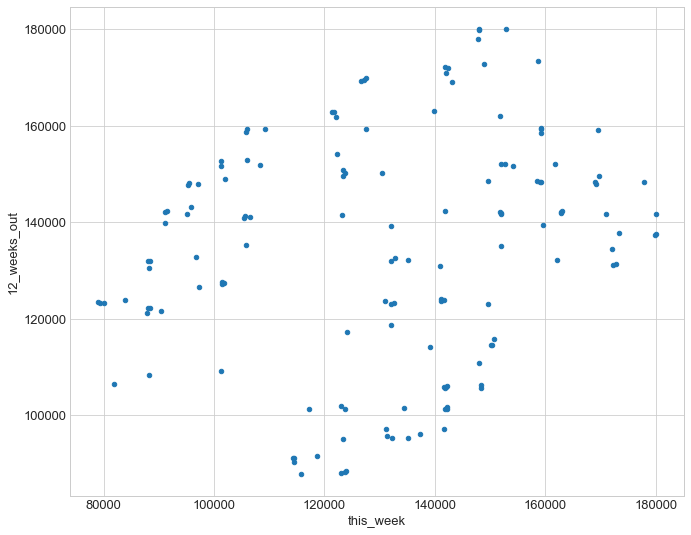

In [43]:
# 12 weeks out
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

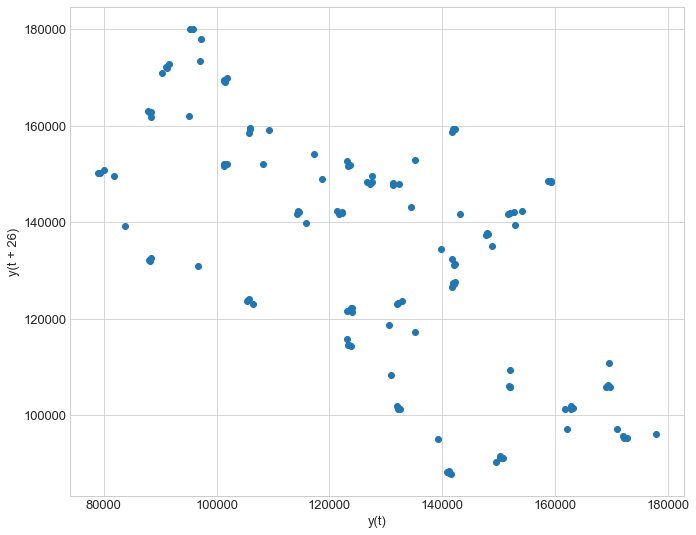

In [44]:
# utilizing the lag_plot function to create lag plot
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

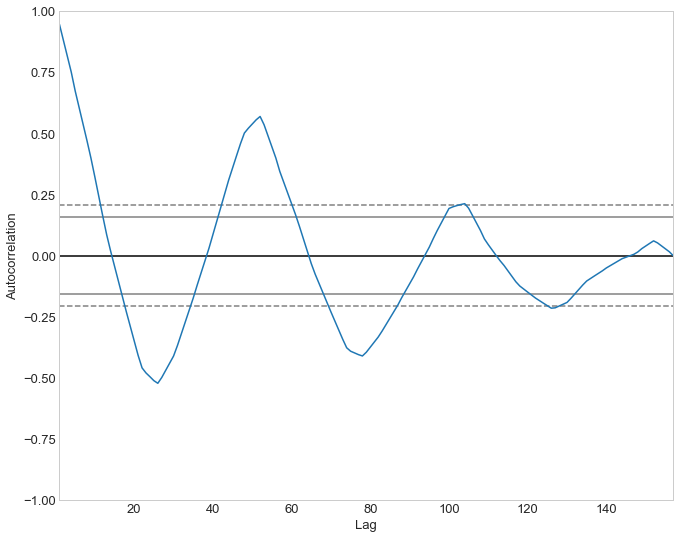

In [47]:
# Auto Correlation plot. Measures the linear relationship between lagged time series.
# Autocorrelation plot shows the correlation coef as a function of lag time
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

### This can help us identify seasonality by looking at the peaks and valleys of the resulting visualization. The peaks can tells us the frequency with which the seasonality repeats itself, and the valleys show us where the correlation is the most negative.

### The dashed lines are a way measure whether the observed autocorrelation is a meaningful signal or just white noise. If the majority of the peaks and valleys fall within the dashed lines, the time series is probably white noise.

# Exercise
### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [50]:
df = opsd_germany_daily()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


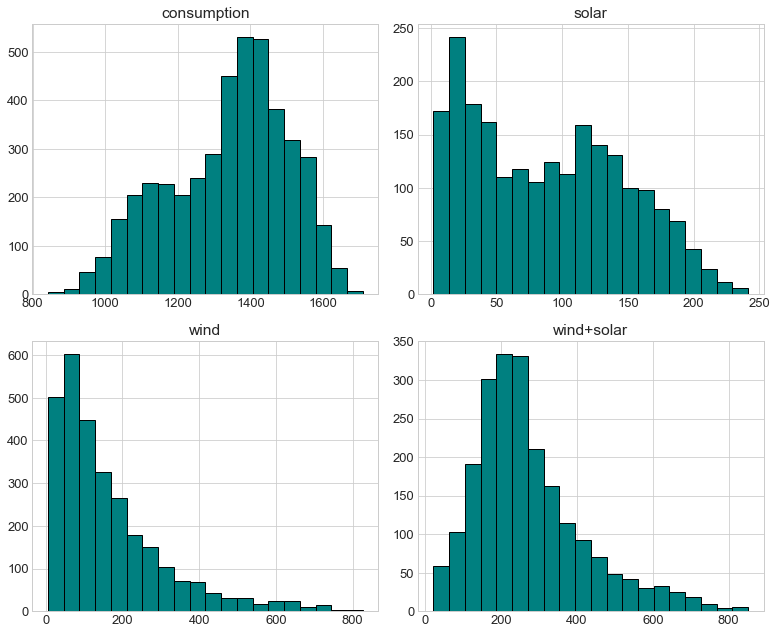

In [51]:
df = prep_german_data(df)

In [52]:
df.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


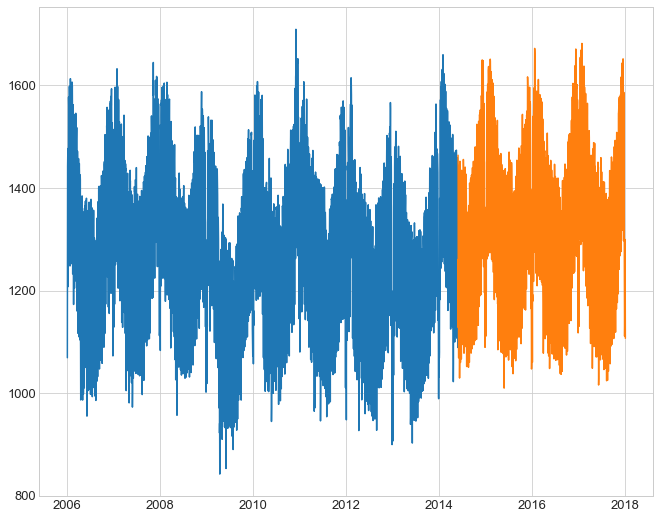

In [53]:
# Splitting the data using the percent cutoff method
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)

## 2. Validate your splits by plotting X_train and y_train

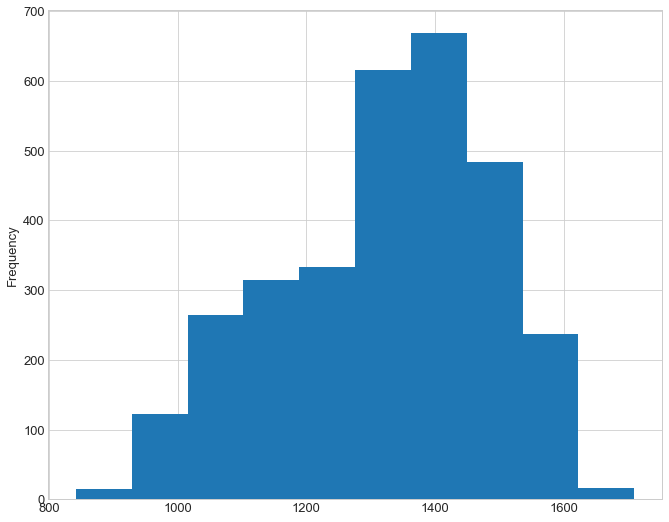

In [65]:
y = train.consumption
y.plot.hist()
plt.show() # gets rid of the wording above the graph

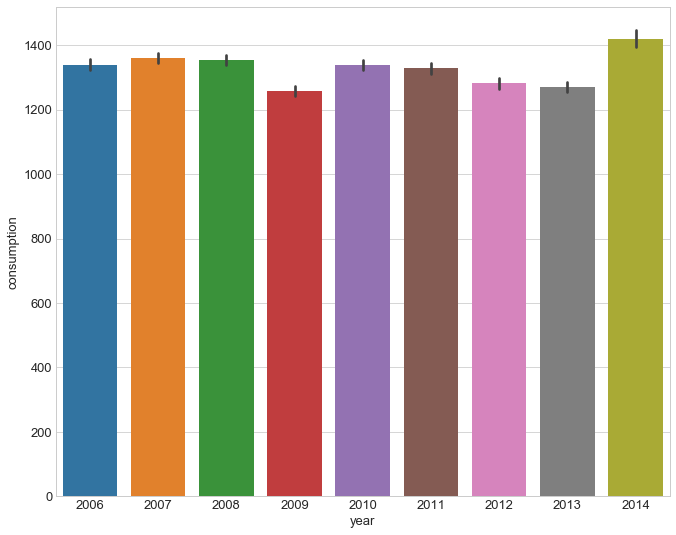

In [55]:
sns.barplot(data = train, y='consumption', x = 'year')
plt.show()

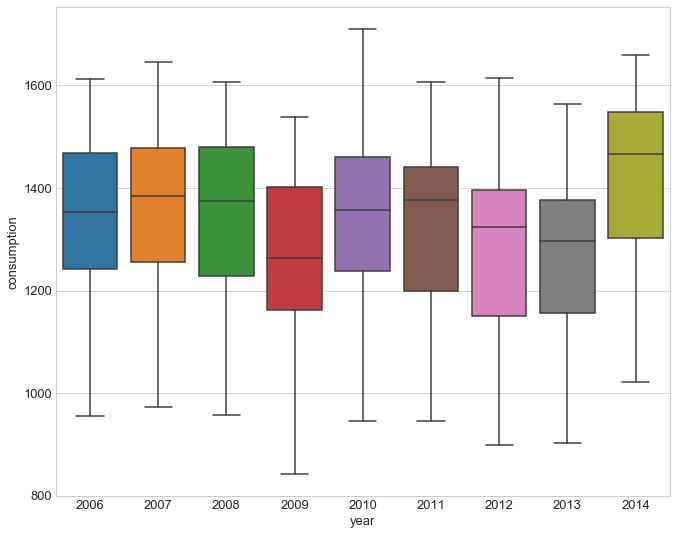

In [59]:
sns.boxplot(data = train, y='consumption', x = 'year')
plt.show()

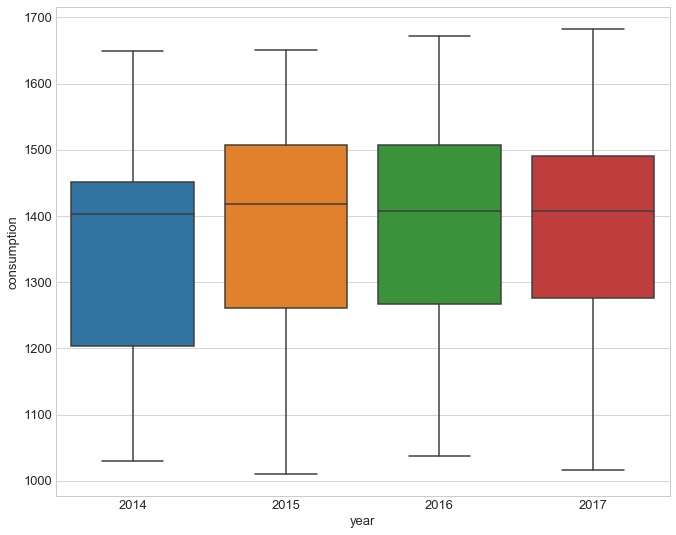

In [60]:
sns.boxplot(data = test, y='consumption', x='year')
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


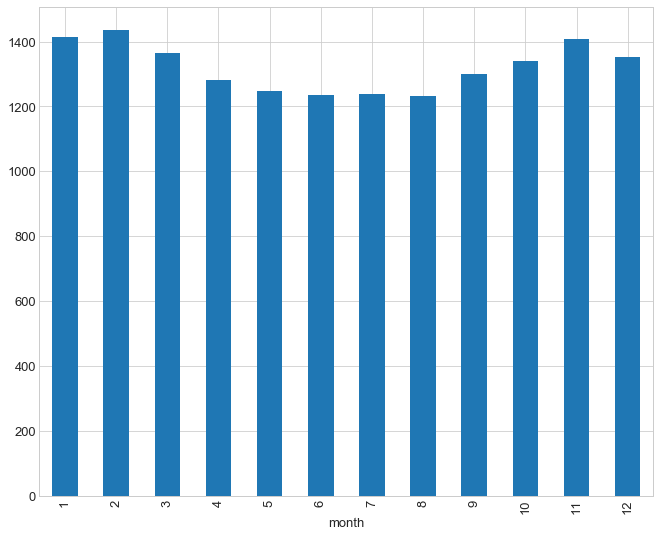

In [63]:
train['month'] = train.index.month
train.groupby('month').consumption.mean().plot.bar()

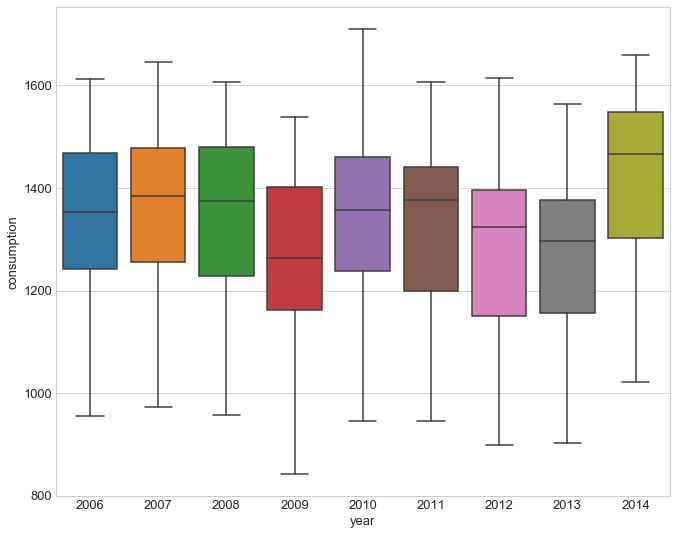

In [67]:
# Consumption on the test set
sns.boxplot(data = train, y='consumption', x = 'year')
plt.show()

## 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

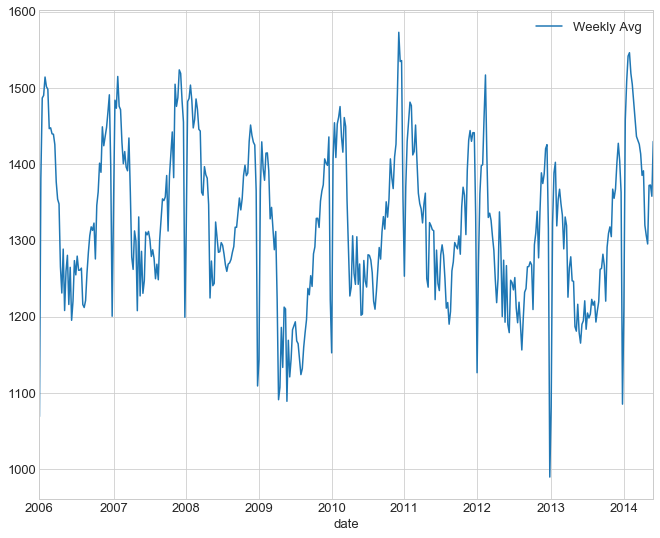

In [68]:
y.resample('W').mean().plot(label= 'Weekly Avg')
plt.legend()
plt.show()

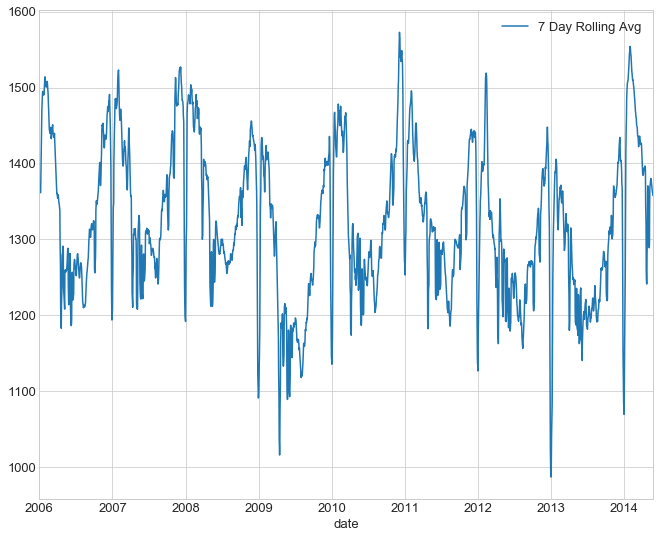

In [69]:
y.rolling(7).mean().plot(label = '7 Day Rolling Avg')
plt.legend()
plt.show()

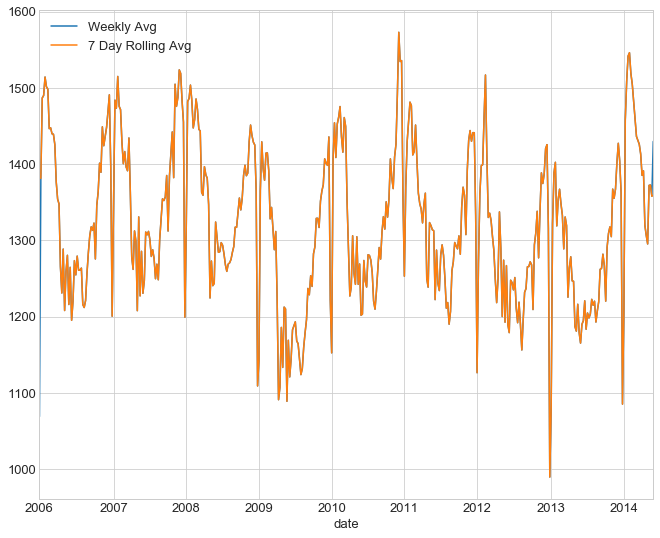

In [71]:
y.resample('W').mean().plot(label= 'Weekly Avg')
y.rolling(7).mean().plot(label = '7 Day Rolling Avg')
plt.legend()
plt.show()

# 4. Group the electricity consumption time series by month of year, to explore annual seasonality.

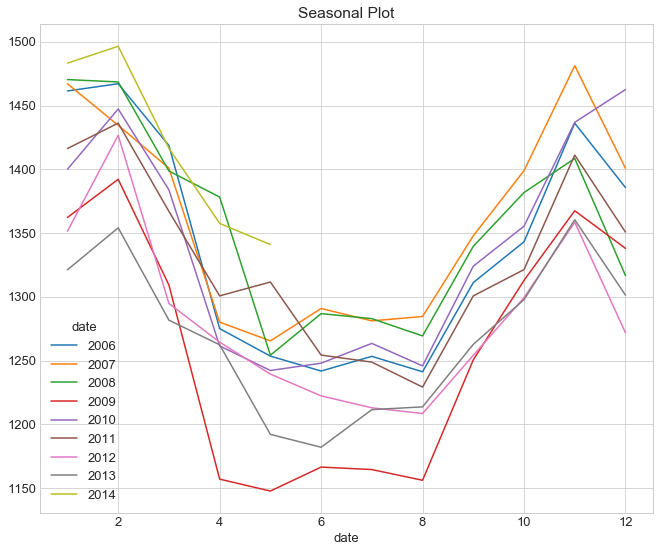

In [72]:
# Seasonal Plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

# 5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

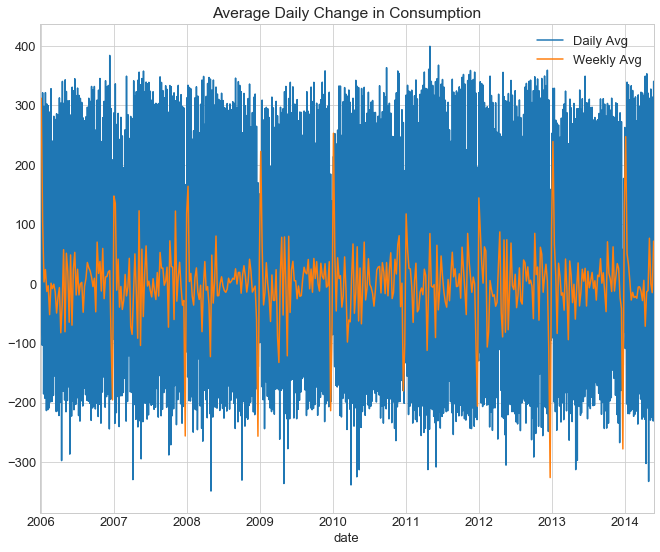

In [73]:
y.resample('D').mean().diff().plot(label='Daily Avg')
y.resample('W').mean().diff().plot(label= 'Weekly Avg')
plt.title('Average Daily Change in Consumption')
plt.legend()
plt.show()

# 6. Plot a time series decomposition. Takeaways?

In [74]:
y = train.consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2006-01-01,1069.184000,NaN,-68.437315,NaN
2006-01-08,1381.300143,NaN,-125.834756,NaN
2006-01-15,1486.730286,NaN,35.842411,NaN
2006-01-22,1490.031143,NaN,106.451350,NaN
2006-01-29,1514.176857,NaN,122.022124,NaN


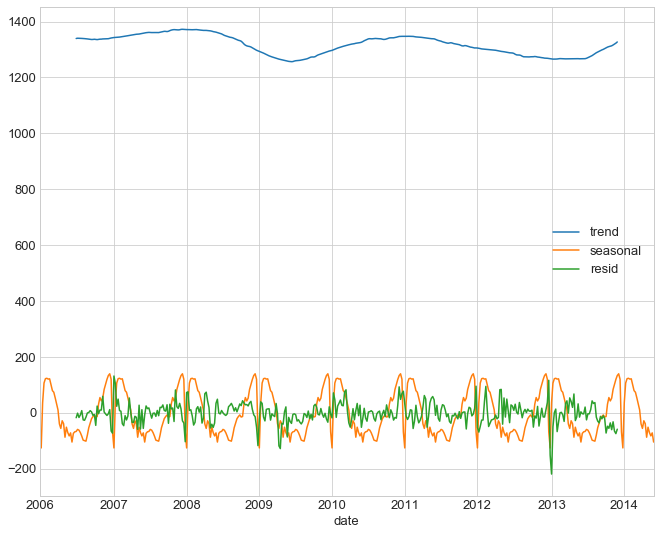

In [75]:
# Decomposition Code: Visual
decomposition.iloc[:, 1:].plot()

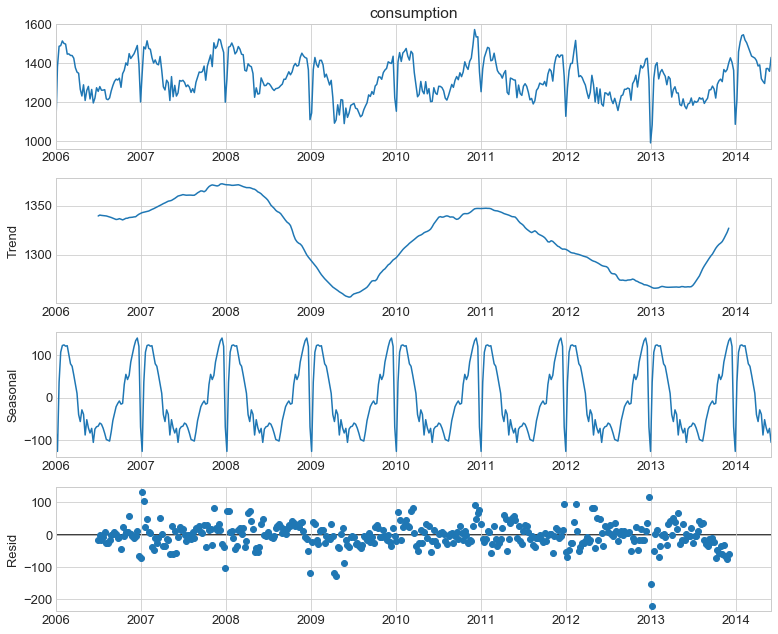

In [76]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Take aways:
- Higher consumption in the winter months
- Interesting dip in energy consumption at the end of the year. 
- Less energy consumed in the summer. 

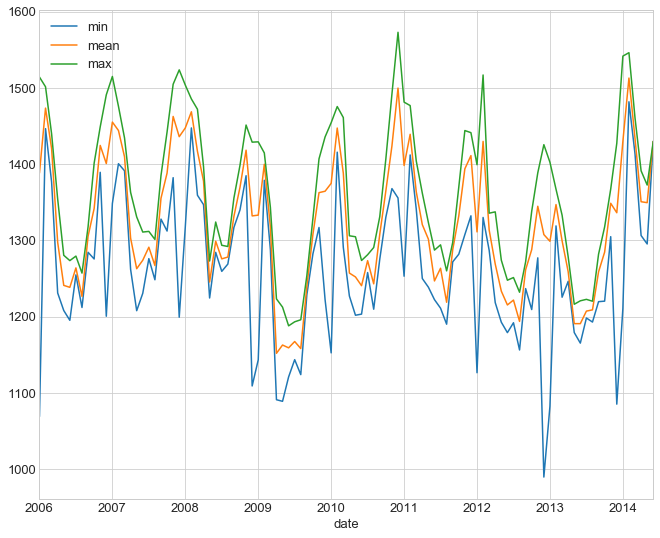

In [77]:
y.resample('M').agg(['min', 'mean', 'max']).plot()

# Seasonal Subseries Plot

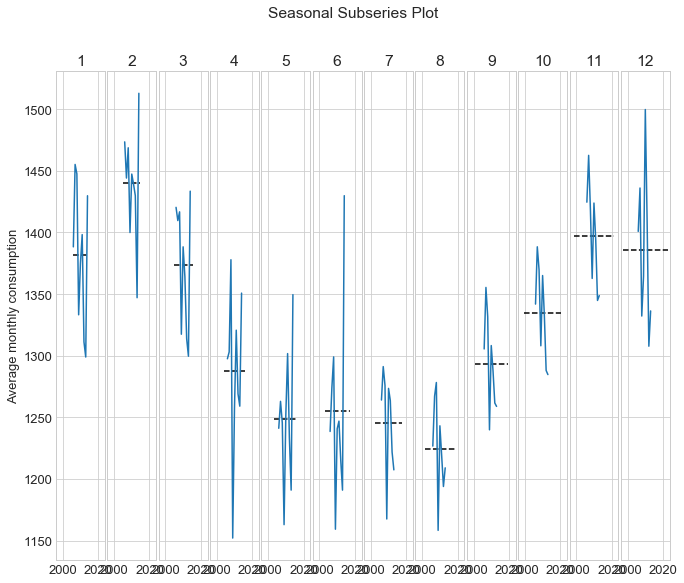

In [82]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

axs[0].set(ylabel='Average monthly consumption')
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=.05)
# fig.tight_layout()

# Weekly lag plot

,this_week,wind,solar,wind+solar,month,year,the_next_week
date,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,1501.403286
...,...,...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,4.571429,2014.0,1372.166000
2014-05-11,1372.166000,204.100143,124.597143,328.697286,5.000000,2014.0,1372.636143
2014-05-18,1372.636143,117.518286,131.462000,248.980286,5.000000,2014.0,1357.924714


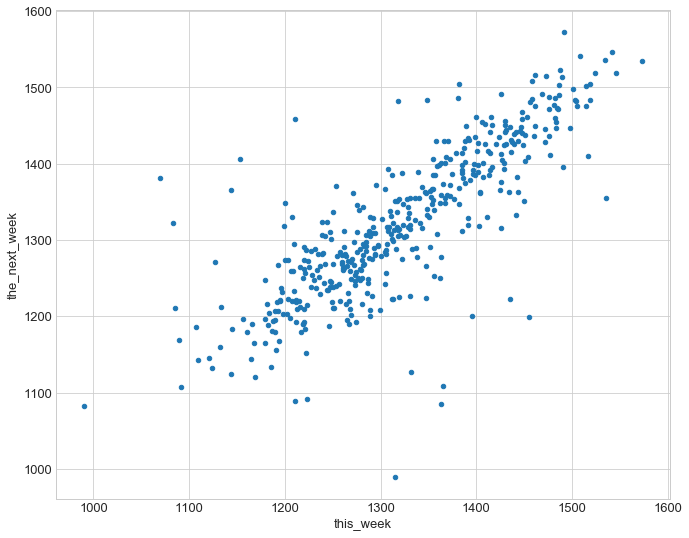

In [84]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.consumption.shift(-1)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

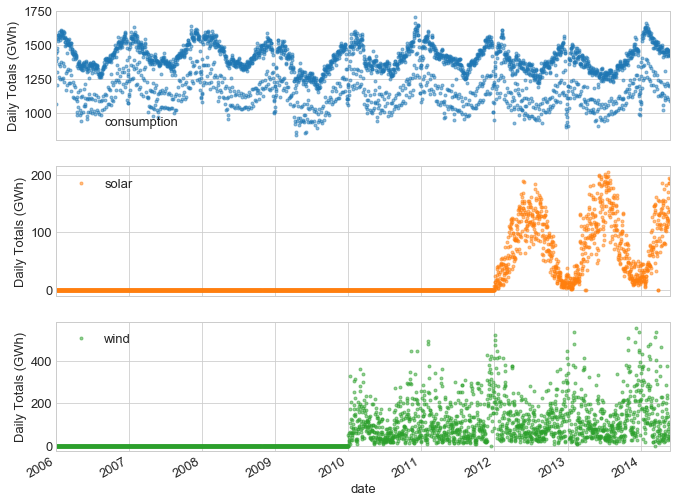

In [90]:
cols_plot = ['consumption', 'solar', 'wind']
axes = train[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [127]:
# Splitting the data using the percent cutoff method
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [128]:
y = train.consumption
y = pd.DataFrame(y)
y.head()

,consumption
date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [129]:
# create a categorical feature
y['consumption_bin'] = pd.qcut(y.consumption, 4, labels=['low', 'low_mid', 'mid_high', 'high'])
y.groupby('consumption_bin').mean()

,consumption
consumption_bin,
low,1087.649859
low_mid,1289.750096
mid_high,1393.519502
high,1515.531231


In [131]:
(train.groupby('consumption')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

AttributeError: 'Series' object has no attribute '_mgr'

In [100]:
ax = train.loc['2017', 'consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

KeyError: '2017'

In [102]:
ax = train.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

KeyError: 'Consumption'